In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy import stats
import seaborn as sns

%matplotlib inline

Mounted at /content/drive


In [3]:

movies_df = pd.read_csv(join(path_prefix,"movies.csv"))


netflix_df = pd.read_csv(join(path_prefix,"Best Movies Netflix.csv"))

netflix_df = netflix_df.rename(columns={
    "TITLE": "title",
    "RELEASE_YEAR": "year",
    "SCORE": "score",
    "NUMBER_OF_VOTES": "votes",
    "DURATION": "runtime",
    "MAIN_GENRE": "genre",
    "MAIN_PRODUCTION": "country"
})

In [4]:
movies_df["title"] = movies_df["name"].str.lower()
netflix_df["title"] = netflix_df["title"].str.lower()

In [5]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,title
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,the shining
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,the blue lagoon
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,star wars: episode v - the empire strikes back
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,airplane!
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,caddyshack


In [6]:
netflix_df.head()

,index,title,year,score,votes,runtime,genre,country
0,0,david attenborough: a life on our planet,2020,9.0,31180,83,documentary,GB
1,1,inception,2010,8.8,2268288,148,scifi,GB
2,2,forrest gump,1994,8.8,1994599,142,drama,US
3,3,anbe sivam,2003,8.7,20595,160,comedy,IN
4,4,bo burnham: inside,2021,8.7,44074,87,comedy,US


In [8]:

netflix_df = netflix_df[["title", "year", "score", "votes", "runtime", "genre", "country"]]
movies_df = movies_df[["title", "year", "score", "votes", "runtime", "genre", "country", "budget", "gross"]]

# Duplicated rows dropped
netflix_df = netflix_df.drop_duplicates(subset=["title", "year"])
movies_df = movies_df.drop_duplicates(subset=["title", "year"])

# Dropna
netflix_df = netflix_df.dropna(subset=["score", "votes", "runtime", "genre"])
movies_df = movies_df.dropna(subset=["score", "votes", "runtime", "genre", "budget"])


In [9]:
# Merging datasets
merged_df = pd.merge(netflix_df, movies_df, on=["title", "year"], suffixes=('_netflix', '_movies'))

merged_df.head()


,title,year,score_netflix,votes_netflix,runtime_netflix,genre_netflix,country_netflix,score_movies,votes_movies,runtime_movies,genre_movies,country_movies,budget,gross
0,inception,2010,8.8,2268288,148,scifi,GB,8.8,2100000.0,148.0,Action,United States,160000000.0,836836967.0
1,forrest gump,1994,8.8,1994599,142,drama,US,8.8,1900000.0,142.0,Drama,United States,55000000.0,678226133.0
2,saving private ryan,1998,8.6,1346020,169,drama,US,8.6,1300000.0,169.0,Drama,United States,70000000.0,482349603.0
3,django unchained,2012,8.4,1472668,165,western,US,8.4,1400000.0,165.0,Drama,United States,100000000.0,426074373.0
4,once upon a time in america,1984,8.3,342335,229,drama,US,8.4,321000.0,229.0,Crime,Italy,30000000.0,5473212.0


In [10]:
# Compare average IMDb scores
print("Average IMDb score - Netflix:", merged_df["score_netflix"].mean())
print("Average IMDb score - Traditional:", merged_df["score_movies"].mean())


Average IMDb score - Netflix: 7.475206611570248
Average IMDb score - Traditional: 7.478512396694215


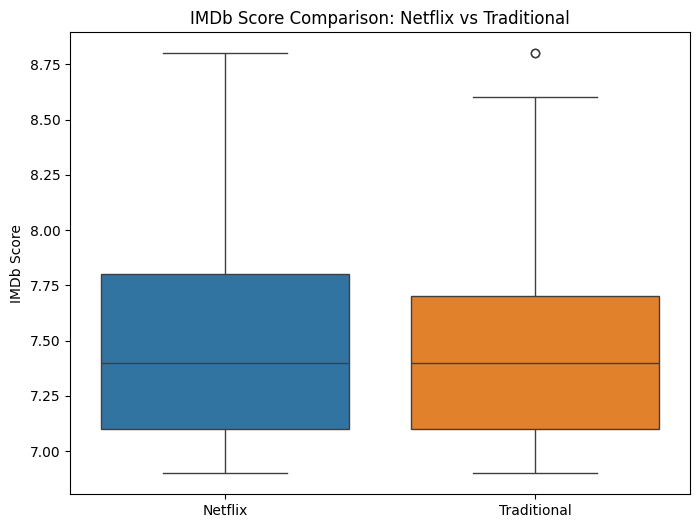

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df[["score_netflix", "score_movies"]])
plt.xticks([0, 1], ["Netflix", "Traditional"])
plt.title("IMDb Score Comparison: Netflix vs Traditional")
plt.ylabel("IMDb Score")
plt.show()


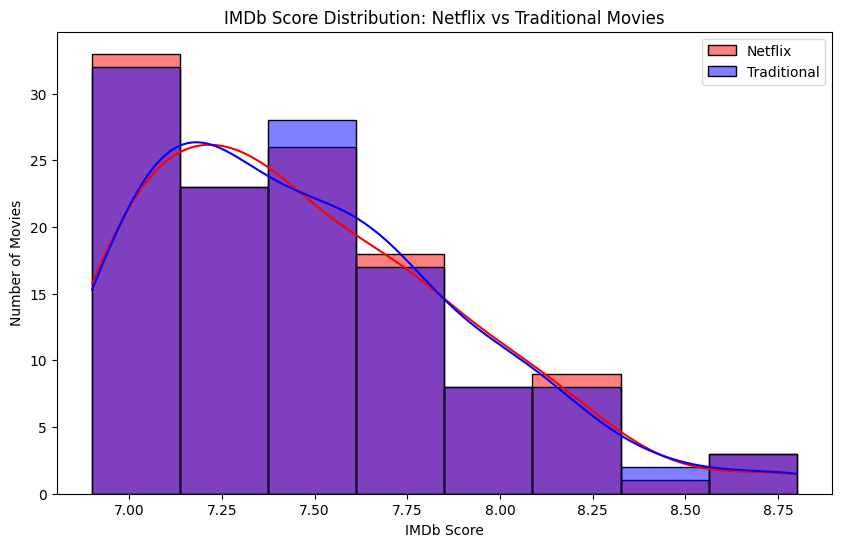

In [ ]:
# Histogram: IMDb ratings for Netflix vs Traditional
plt.figure(figsize=(10, 6))
sns.histplot(merged_df["score_netflix"], color="red", label="Netflix", kde=True)
sns.histplot(merged_df["score_movies"], color="blue", label="Traditional", kde=True)
plt.title("IMDb Score Distribution: Netflix vs Traditional Movies")
plt.xlabel("IMDb Score")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()


<ipython-input-12-5ea590e4b9b5>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df["runtime_netflix"], label="Netflix", shade=True)
<ipython-input-12-5ea590e4b9b5>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(merged_df["runtime_movies"], label="Traditional", shade=True)


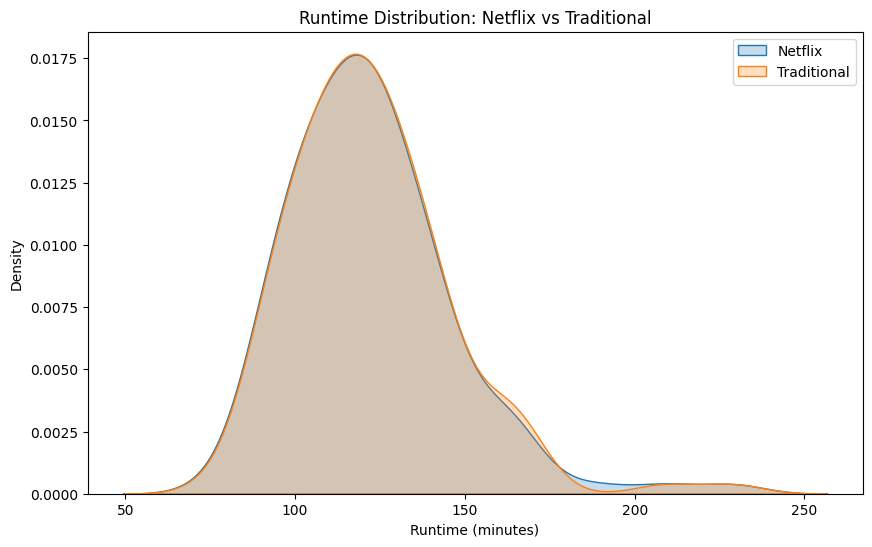

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(merged_df["runtime_netflix"], label="Netflix", shade=True)
sns.kdeplot(merged_df["runtime_movies"], label="Traditional", shade=True)
plt.title("Runtime Distribution: Netflix vs Traditional")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Density")
plt.legend()
plt.show()


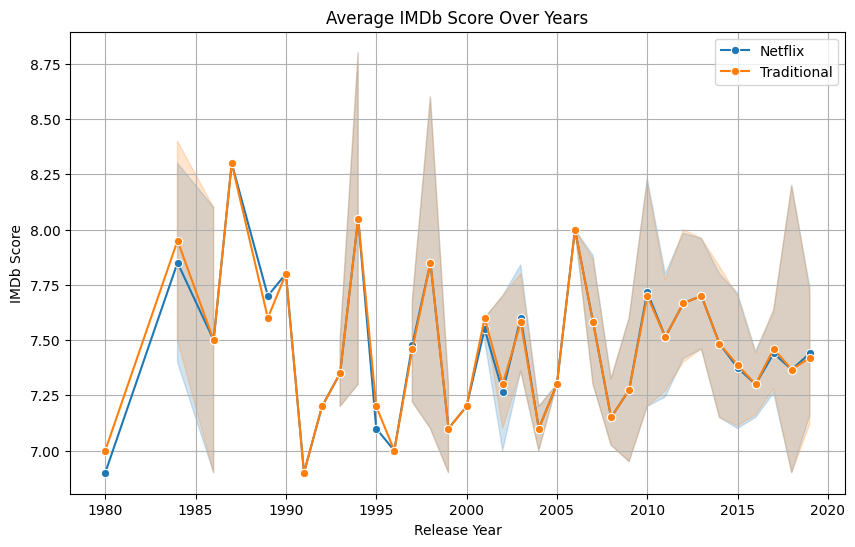

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="year", y="score_netflix", data=merged_df, label="Netflix", marker="o")
sns.lineplot(x="year", y="score_movies", data=merged_df, label="Traditional", marker="o")
plt.title("Average IMDb Score Over Years")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.legend()
plt.grid(True)
plt.show()


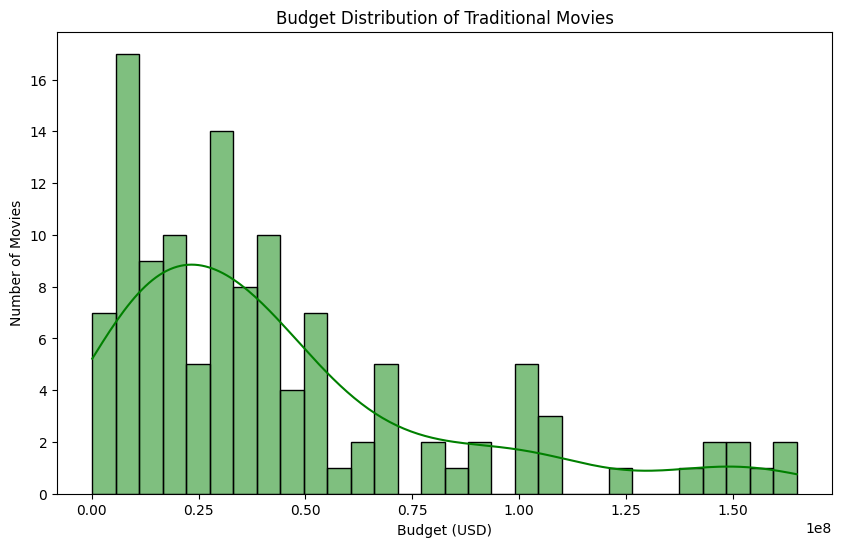

Average budget of traditional movies: $44,540,455


In [ ]:
# Budget distribution of traditional movies
plt.figure(figsize=(10, 6))
sns.histplot(merged_df["budget"], bins=30, color="green", kde=True)
plt.title("Budget Distribution of Traditional Movies")
plt.xlabel("Budget (USD)")
plt.ylabel("Number of Movies")
plt.show()
print("Average budget of traditional movies: ${:,.0f}".format(merged_df["budget"].mean()))


Correlation between budget and IMDb score (traditional): 0.27403715449581684


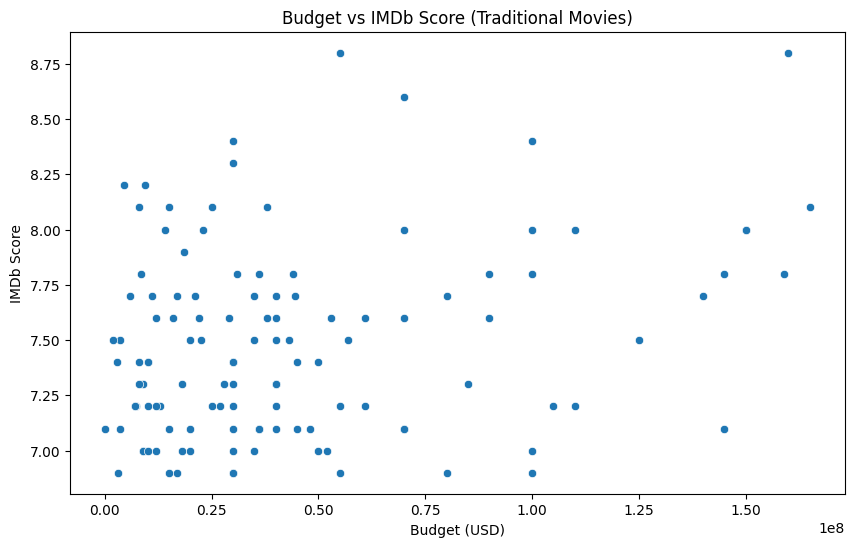

In [ ]:
# Calculate correlation
correlation = merged_df["budget"].corr(merged_df["score_movies"])
print("Correlation between budget and IMDb score (traditional):", correlation)

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="budget", y="score_movies", data=merged_df)
plt.title("Budget vs IMDb Score (Traditional Movies)")
plt.xlabel("Budget (USD)")
plt.ylabel("IMDb Score")
plt.show()


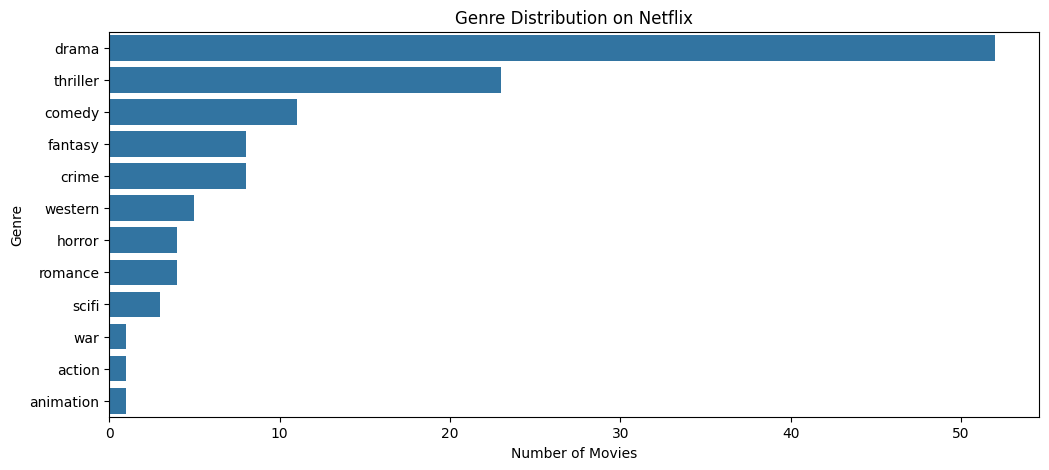

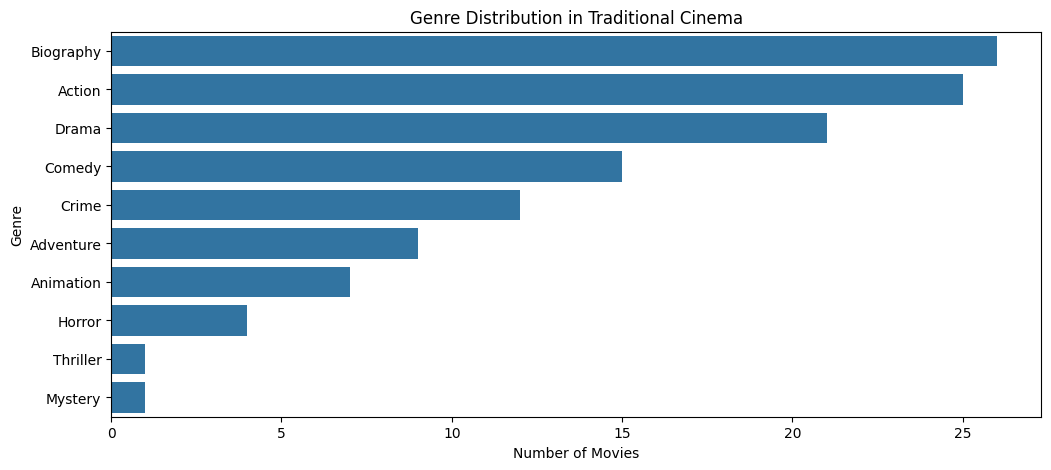

In [ ]:
# Netflix genre distribution
plt.figure(figsize=(12, 5))
sns.countplot(y="genre_netflix", data=merged_df, order=merged_df["genre_netflix"].value_counts().index)
plt.title("Genre Distribution on Netflix")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

# Traditional genre distribution
plt.figure(figsize=(12, 5))
sns.countplot(y="genre_movies", data=merged_df, order=merged_df["genre_movies"].value_counts().index)
plt.title("Genre Distribution in Traditional Cinema")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()


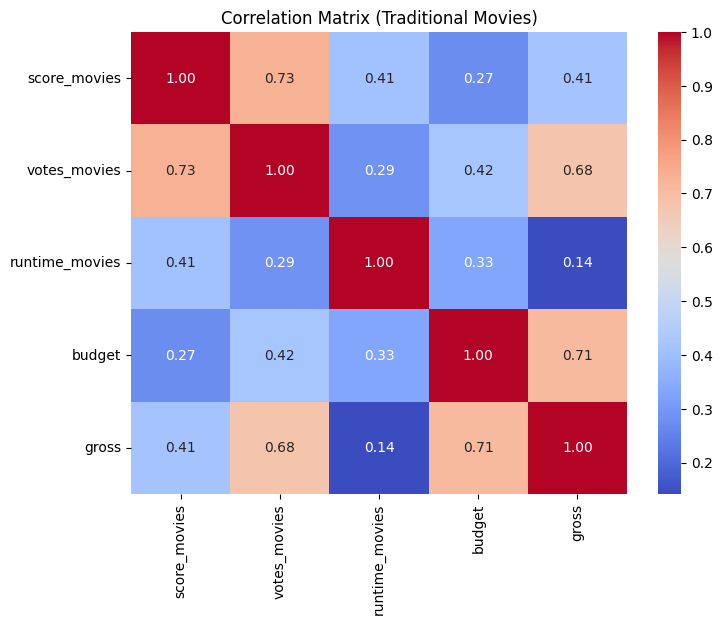

In [14]:
plt.figure(figsize=(8, 6))
numeric_cols = ["score_movies", "votes_movies", "runtime_movies", "budget", "gross"]
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Traditional Movies)")
plt.show()


📌 Hypotheses:
Null Hypothesis (H₀): There is no significant difference in average IMDb scores between Netflix and traditional movies.

Alternative Hypothesis (H₁): There is a significant difference in average IMDb scores.

In [ ]:
# Perform an independent t-test on IMDb scores
t_stat, p_val = stats.ttest_ind(merged_df["score_netflix"], merged_df["score_movies"])

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpret the result
if p_val < 0.05:
    print("✅ Result: Reject the null hypothesis. There is a significant difference.")
else:
    print("❌ Result: Fail to reject the null hypothesis. No significant difference.")


T-statistic: -0.05972111898582772
P-value: 0.9524274494200894
❌ Result: Fail to reject the null hypothesis. No significant difference.


Chi-Squared Test: Is the distribution of genres different between the two platforms?

In [ ]:
# Create frequency tables for genres
genre_netflix_counts = merged_df["genre_netflix"].value_counts()
genre_movies_counts = merged_df["genre_movies"].value_counts()

# Combine into a single DataFrame and fill NaNs with 0
genre_df = pd.concat([genre_netflix_counts, genre_movies_counts], axis=1, keys=["Netflix", "Traditional"]).fillna(0)

# Chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(genre_df)

print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("✅ Result: Reject the null hypothesis. Genre distribution differs significantly.")
else:
    print("❌ Result: Fail to reject the null hypothesis. No significant difference in genre distribution.")


Chi-squared statistic: 242.0
P-value: 1.6507341364310788e-39
✅ Result: Reject the null hypothesis. Genre distribution differs significantly.


In [ ]:
# First, categorize IMDb scores into bins
def categorize_score(score):
    if score <= 6.0:
        return "Low"
    elif score <= 7.5:
        return "Medium"
    else:
        return "High"

# Apply categorization separately to Netflix and Traditional scores
merged_df["score_cat_netflix"] = merged_df["score_netflix"].apply(categorize_score)
merged_df["score_cat_movies"] = merged_df["score_movies"].apply(categorize_score)


In [ ]:
# Create contingency table for Netflix
contingency_netflix = pd.crosstab(merged_df["genre_netflix"], merged_df["score_cat_netflix"])

# Run Chi-squared test
chi2_n, p_n, dof_n, expected_n = stats.chi2_contingency(contingency_netflix)

print("Netflix - Chi-squared statistic:", chi2_n)
print("Netflix - P-value:", p_n)

if p_n < 0.05:
    print("✅ Result: There is a significant relationship between genre and IMDb rating (Netflix).")
else:
    print("❌ Result: No significant relationship between genre and IMDb rating (Netflix).")


Netflix - Chi-squared statistic: 18.03315141453799
Netflix - P-value: 0.08081456440348647
❌ Result: No significant relationship between genre and IMDb rating (Netflix).


In [ ]:
# Create contingency table for Traditional
contingency_movies = pd.crosstab(merged_df["genre_movies"], merged_df["score_cat_movies"])

# Run Chi-squared test
chi2_m, p_m, dof_m, expected_m = stats.chi2_contingency(contingency_movies)

print("Traditional - Chi-squared statistic:", chi2_m)
print("Traditional - P-value:", p_m)

if p_m < 0.05:
    print("✅ Result: There is a significant relationship between genre and IMDb rating (Traditional).")
else:
    print("❌ Result: No significant relationship between genre and IMDb rating (Traditional).")


Traditional - Chi-squared statistic: 10.576815751473287
Traditional - P-value: 0.3058341690714748
❌ Result: No significant relationship between genre and IMDb rating (Traditional).


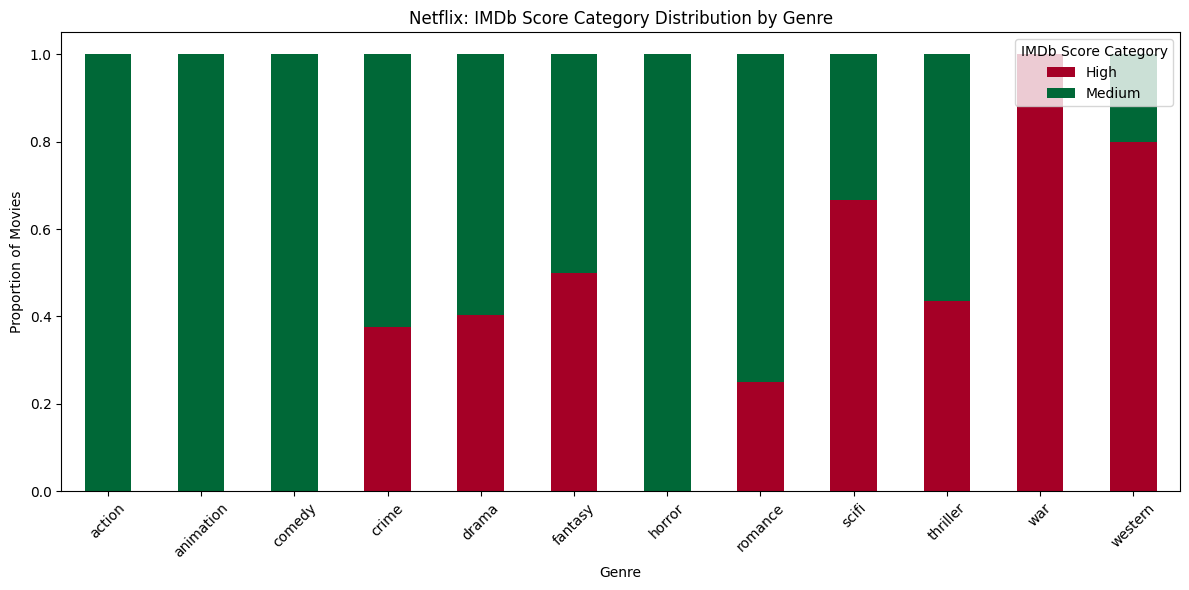

In [ ]:
# Normalize counts within each genre to get proportions
netflix_plot_data = pd.crosstab(merged_df["genre_netflix"], merged_df["score_cat_netflix"], normalize='index')

# Plot as a stacked bar chart
netflix_plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='RdYlGn')
plt.title("Netflix: IMDb Score Category Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Proportion of Movies")
plt.legend(title="IMDb Score Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


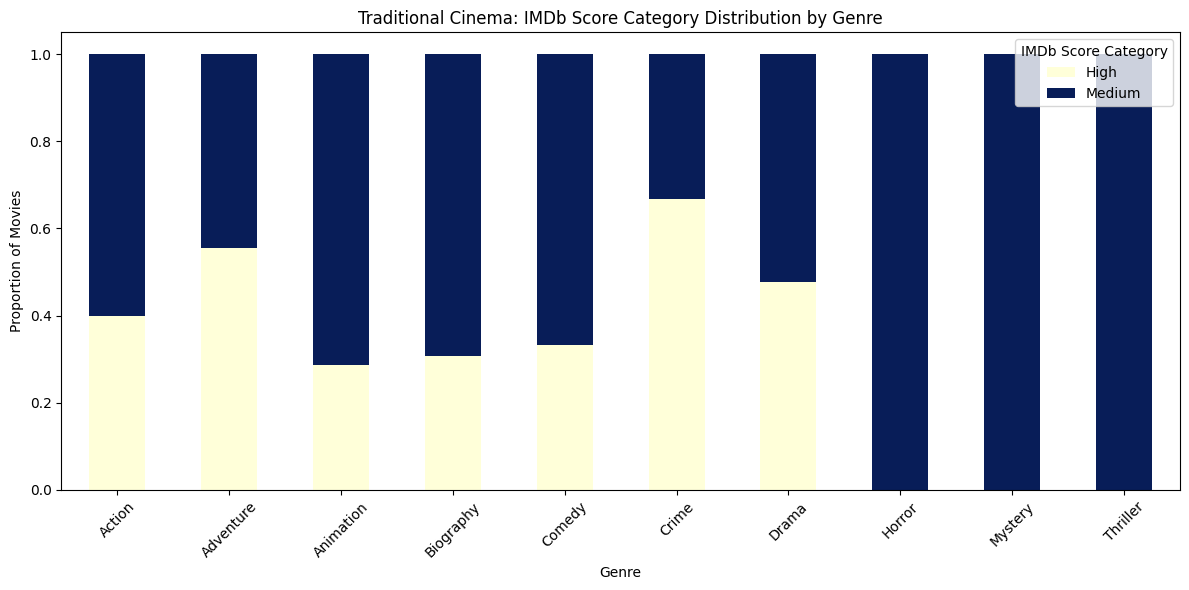

In [ ]:
# Normalize counts within each genre to get proportions
movies_plot_data = pd.crosstab(merged_df["genre_movies"], merged_df["score_cat_movies"], normalize='index')

# Plot as a stacked bar chart
movies_plot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='YlGnBu')
plt.title("Traditional Cinema: IMDb Score Category Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Proportion of Movies")
plt.legend(title="IMDb Score Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
